# About the Dataset

- work_year: The year in which the data was recorded. This field indicates the temporal context of the data, important for understanding salary trends over time.

- job_title: The specific title of the job role, like 'Data Scientist', 'Data Engineer', or 'Data Analyst'. This column is crucial for understanding the salary distribution across various specialized roles within the data field.

- job_category: A classification of the job role into broader categories for easier analysis. This might include areas like 'Data Analysis', 'Machine Learning', 'Data Engineering', etc.

- salary_currency: The currency in which the salary is paid, such as USD, EUR, etc. This is important for currency conversion and understanding the actual value of the salary in a global context.

- salary: The annual gross salary of the role in the local currency. This raw salary figure is key for direct regional salary comparisons.

- salary_in_usd: The annual gross salary converted to United States Dollars (USD). This uniform currency conversion aids in global salary comparisons and analyses.

- employee_residence: The country of residence of the employee. This data point can be used to explore geographical salary differences and cost-of-living variations.

- experience_level: Classifies the professional experience level of the employee. Common categories might include 'Entry-level', 'Mid-level', 'Senior', and 'Executive', providing insight into how experience influences salary in data-related roles.

- employment_type: Specifies the type of employment, such as 'Full-time', 'Part-time', 'Contract', etc. This helps in analyzing how different employment arrangements affect salary structures.

- work_setting: The work setting or environment, like 'Remote', 'In-person', or 'Hybrid'. This column reflects the impact of work settings on salary levels in the data industry.

- company_location: The country where the company is located. It helps in analyzing how the location of the company affects salary structures.

- company_size: The size of the employer company, often categorized into small (S), medium (M), and large (L) sizes. This allows for analysis of how company size influences salary.

In [1]:
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns

# Importing and understanding the Dataset

In [2]:
jobs = pd.read_csv('jobs_in_data.csv')
jobs

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [3]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


# Distribution of Values

## Quantitative Values


In [11]:
jobs.describe().astype(int)

,work_year,salary,salary_in_usd
count,9355,9355,9355
mean,2022,149927,150299
std,0,63608,63177
min,2020,14000,15000
25%,2023,105200,105700
50%,2023,143860,143000
75%,2023,187000,186723
max,2023,450000,450000


## Number of Jobs

### per Country

In [172]:
top_3_countries = jobs['company_location'].value_counts(normalize = True).head(3)
top_3_countries

company_location
United States     0.869268
United Kingdom    0.047996
Canada            0.024158
Name: proportion, dtype: float64

In [192]:
top_3_countries.sum()
top_3_countries['United States']

0.8692677712453234

So almost 94% of the data jobs are in the top 3 countries. 87% in USA. So let's see how that evolved in the last 4 years

In [207]:
df = pd.DataFrame(index =jobs['work_year'].unique())

for year in df.index:
    total = 0
    for country in top_3_countries.index:
        df.loc[year,country] = jobs[(jobs['company_location'] == country) & (jobs['work_year'] == year)].shape[0]
        total += df.loc[year,country]

    df.loc[year,'Others'] = jobs[jobs['work_year'] == year].shape[0] - total
    
df


,United States,United Kingdom,Canada,Others
2023,6663.0,340.0,174.0,276.0
2022,1339.0,90.0,38.0,167.0
2020,33.0,4.0,3.0,31.0
2021,97.0,15.0,11.0,74.0


<Axes: >

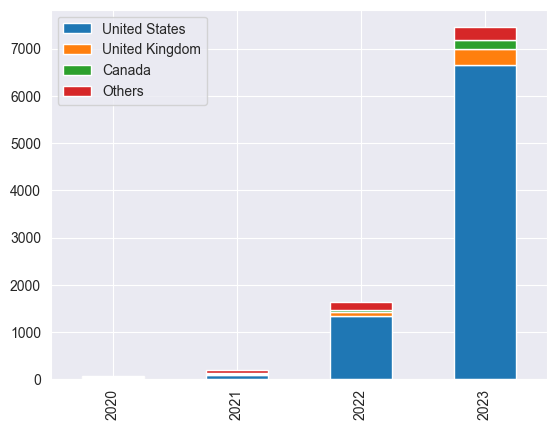

In [210]:
df.sort_index().plot(kind='bar', stacked=True)

### per experience level

In [275]:
for color in sns.color_palette(n_colors = 10).as_hex():
    print (color)

#1f77b4
#ff7f0e
#2ca02c
#d62728
#9467bd
#8c564b
#e377c2
#7f7f7f
#bcbd22
#17becf


In [288]:
jobs['experience_level'].value_counts()

experience_level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64

In [297]:
exp_levels = jobs['experience_level'].value_counts().sort_values(ascending=False).index
exp_levels_color = sns.color_palette(n_colors = len(exp_levels)).as_hex()

In [298]:
exp_levels

Index(['Senior', 'Mid-level', 'Entry-level', 'Executive'], dtype='object', name='experience_level')

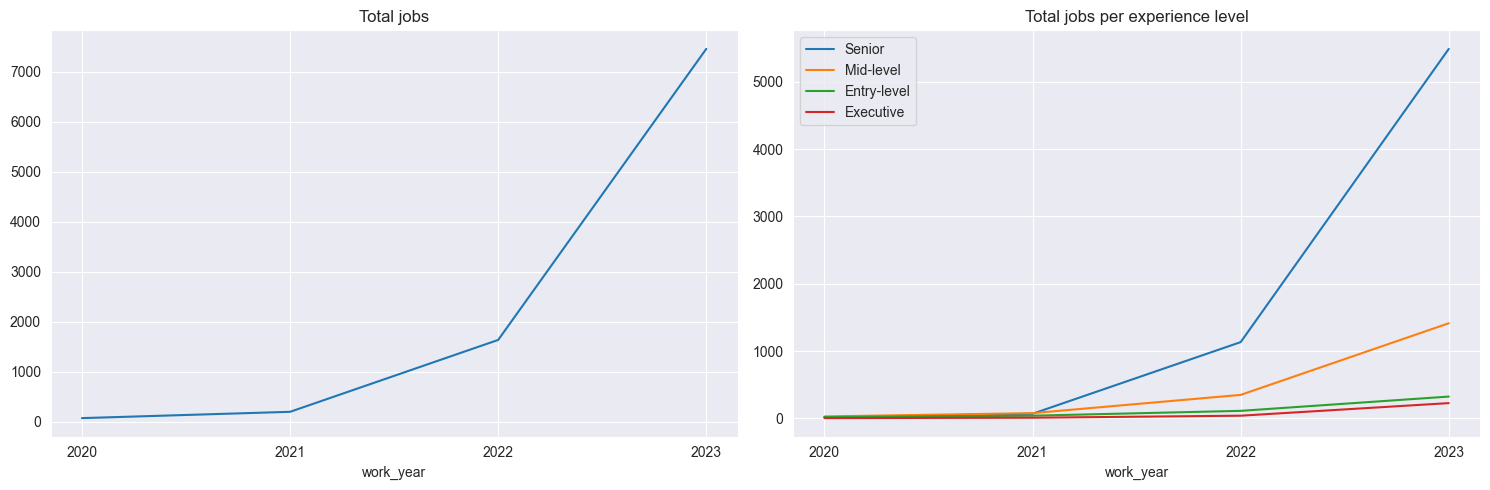

In [299]:

plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
jobs['work_year'].value_counts().sort_index().plot(
    kind = 'line'
)
plt.xticks(jobs['work_year'].unique())
plt.title(label = 'Total jobs')

plt.subplot(1, 2, 2)
for exp,color in zip(exp_levels, exp_levels_color):
    jobs[jobs['experience_level']==exp]['work_year'].value_counts().sort_index().plot(
        kind = 'line',
        label = exp,
        color = color
    )

plt.xticks(jobs['work_year'].unique())
plt.legend()
plt.title(label = 'Total jobs per experience level')


plt.tight_layout()
plt.show()

<Axes: xlabel='work_year'>

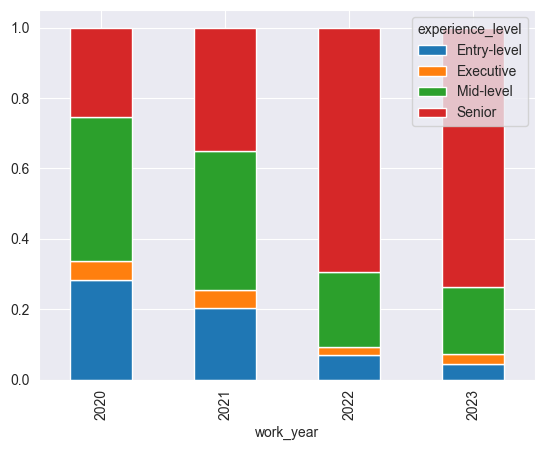

In [302]:
jobs.groupby('work_year')['experience_level'].value_counts(normalize=True).sort_values(ascending=True).unstack('experience_level').plot(kind = 'bar', stacked=True)


The number of jobs have been increasing exponentially in the last 4 years. Specially when we look into Senior jobs, 

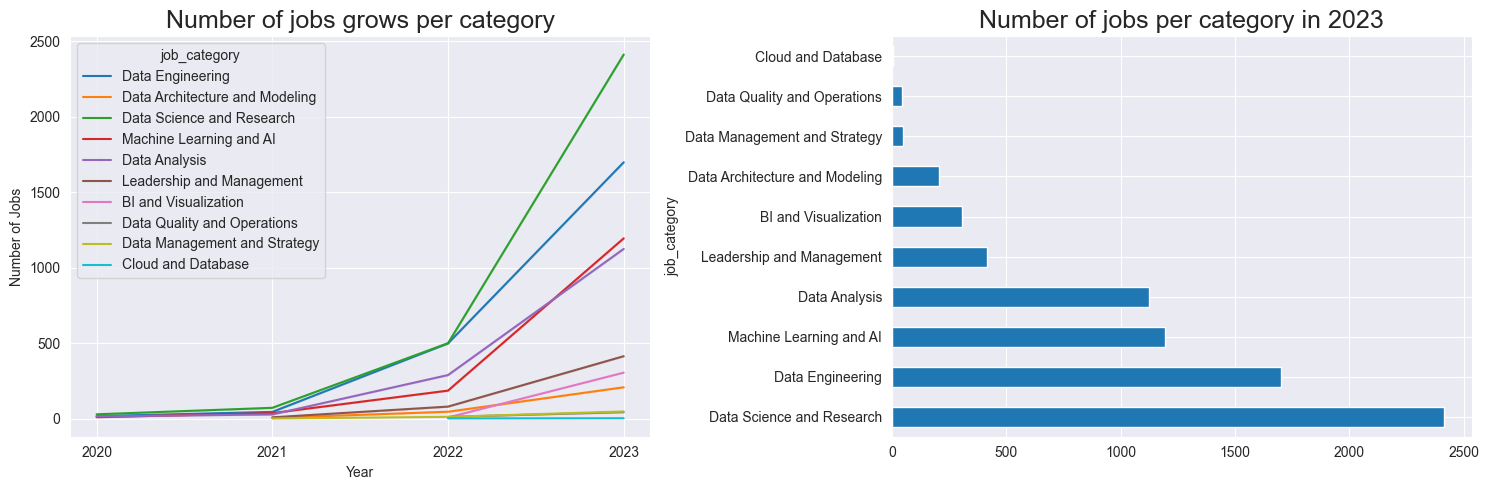

In [601]:
jobs['1'] = 1

plt.figure(figsize = (15,5))


plt.subplot(1, 2, 1)
sns.set_style('darkgrid')
ax = sns.lineplot(
    data = jobs,
    x = 'work_year',
    y = '1',
    hue = 'job_category',
    estimator='sum'

)
ax.set_ylabel('Number of Jobs')
ax.set_xlabel('Year')
ax.set_title('Number of jobs grows per category', fontsize = 18)
plt.xticks(jobs['work_year'].unique())


plt.subplot(1, 2, 2)
ax2 = jobs[jobs['work_year']==2023]['job_category'].value_counts().plot(
    kind='barh',
    title= 'Number of jobs per category in 2023'
    )

ax2.set_title('Number of jobs per category in 2023', fontsize = 18)

plt.tight_layout()
plt.show()

In [603]:
top_4_categories = jobs[jobs['work_year']==2023]['job_category'].value_counts().head(4)

In [593]:
def top4(job):
    if job in top_4_categories.index:
        return job
    else:
        return 'Other'

In [602]:
jobs['category_new'] = jobs['job_category'].apply(top4)

In [799]:
jobs['category_new'].value_counts(normalize=True)

category_new
Data Science and Research    0.322181
Data Engineering             0.241582
Data Analysis                0.155746
Machine Learning and AI      0.152646
Other                        0.127846
Name: proportion, dtype: float64

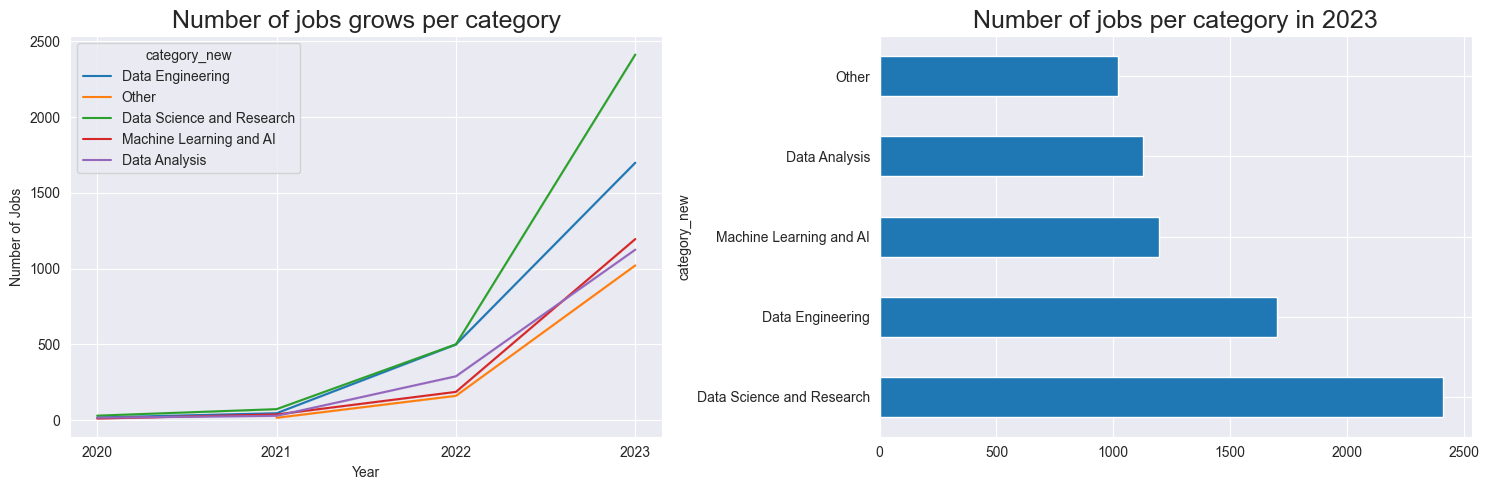

In [604]:

plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
sns.set_style('darkgrid')
ax = sns.lineplot(
    data = jobs,
    x = 'work_year',
    y = '1',
    hue = 'category_new',
    estimator='sum'

)
ax.set_ylabel('Number of Jobs')
ax.set_xlabel('Year')
ax.set_title('Number of jobs grows per category', fontsize = 18)
plt.xticks(jobs['work_year'].unique())


plt.subplot(1, 2, 2)
ax2 = jobs[jobs['work_year']==2023]['category_new'].value_counts().plot(
    kind='barh',
    title= 'Number of jobs per category in 2023'
    )

ax2.set_title('Number of jobs per category in 2023', fontsize = 18)

plt.tight_layout()
plt.show()

## Salaries

We could look into the average salary like the line graph used for number of jobs. But as the number of senior level jobs increased in proportion, definetely we will see an increase in average salaries.

So let's look the evolution of average salary per level of experience

### Salary Growth

#### Per experience level

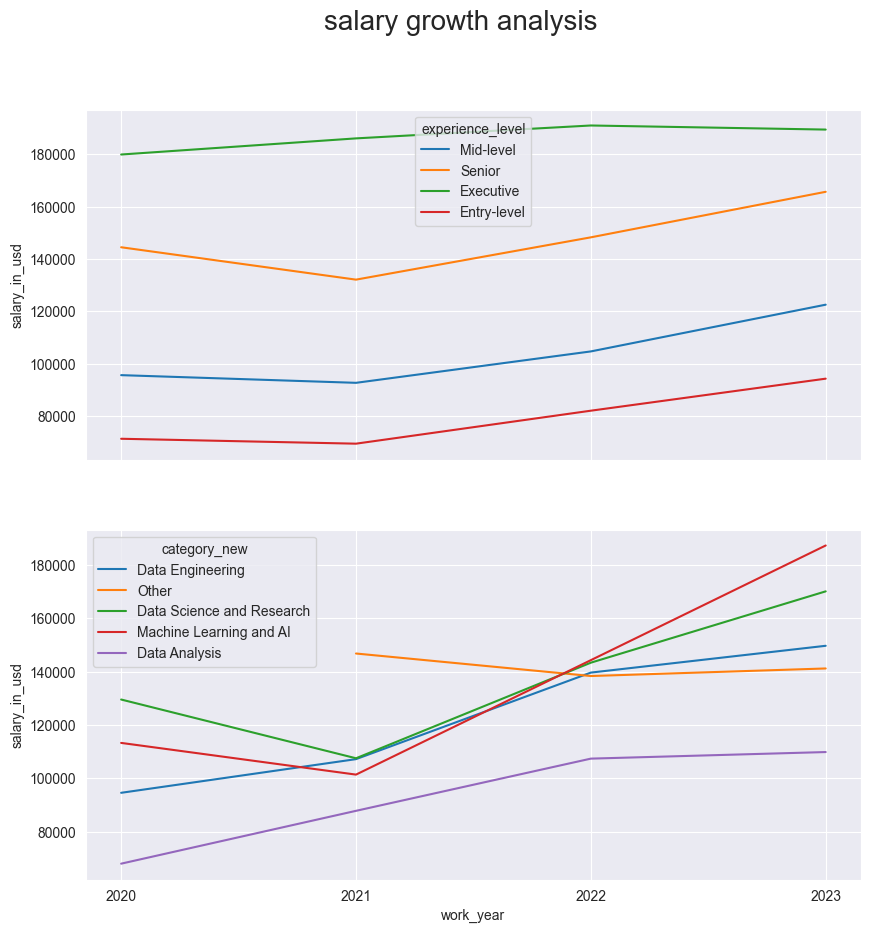

In [597]:
fig, axes = plt.subplots(2,1, figsize = (10,10), sharex=True)

fig.suptitle ('salary growth analysis', fontsize = 20)

sns.set_style('darkgrid')
sns.lineplot(
    ax = axes[0],
    data = jobs,
    x = 'work_year',
    y = 'salary_in_usd',
    hue = 'experience_level',
    estimator='mean',
    errorbar= None
    
)

sns.lineplot(
    ax = axes[1],
    data = jobs,
    x = 'work_year',
    y = 'salary_in_usd',
    hue = 'category_new',
    estimator='mean',
    errorbar= None
    
)
plt.xticks(jobs['work_year'].unique())

plt.show()

### Salary Distribution

#### per experience level

<Axes: xlabel='salary_in_usd', ylabel='Count'>

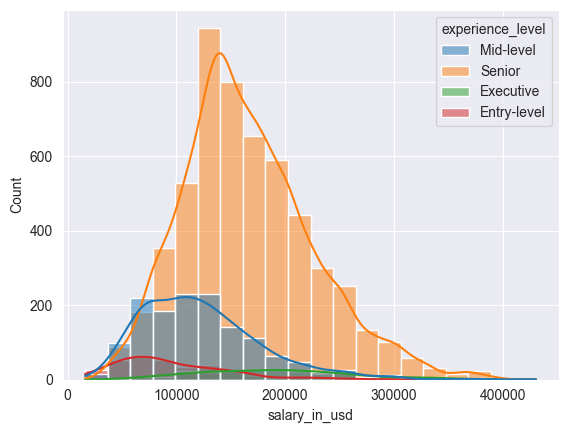

In [307]:
sns.histplot(
    data = jobs[jobs['work_year']==2023],
    x = 'salary_in_usd',
    hue = 'experience_level',
    kde = True,
    bins = 20
)

In [326]:
top_5_countries = jobs[jobs['work_year']==2023]['company_location'].value_counts(normalize = True).head(5)
top_5_countries

company_location
United States     0.894002
United Kingdom    0.045619
Canada            0.023346
Spain             0.008721
Germany           0.003891
Name: proportion, dtype: float64

In [330]:
boxplot_dataframe = jobs[(jobs['work_year'] == 2023) & (jobs['company_location'].isin(top_5_countries.index))]
boxplot_dataframe

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,1
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L,1
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M,1
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M,1
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M,1
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,2023,Machine Learning Engineer,Machine Learning and AI,USD,134500,134500,United States,Senior,Full-time,In-person,United States,L,1
7493,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Mid-level,Full-time,In-person,United States,M,1
7494,2023,Data Scientist,Data Science and Research,USD,90000,90000,United States,Mid-level,Full-time,In-person,United States,M,1
7495,2023,Data Engineer,Data Engineering,USD,160000,160000,United States,Entry-level,Full-time,In-person,United States,M,1


In [331]:
medians = boxplot_dataframe.groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).index
medians

Index(['United States', 'Canada', 'Germany', 'United Kingdom', 'Spain'], dtype='object', name='company_location')

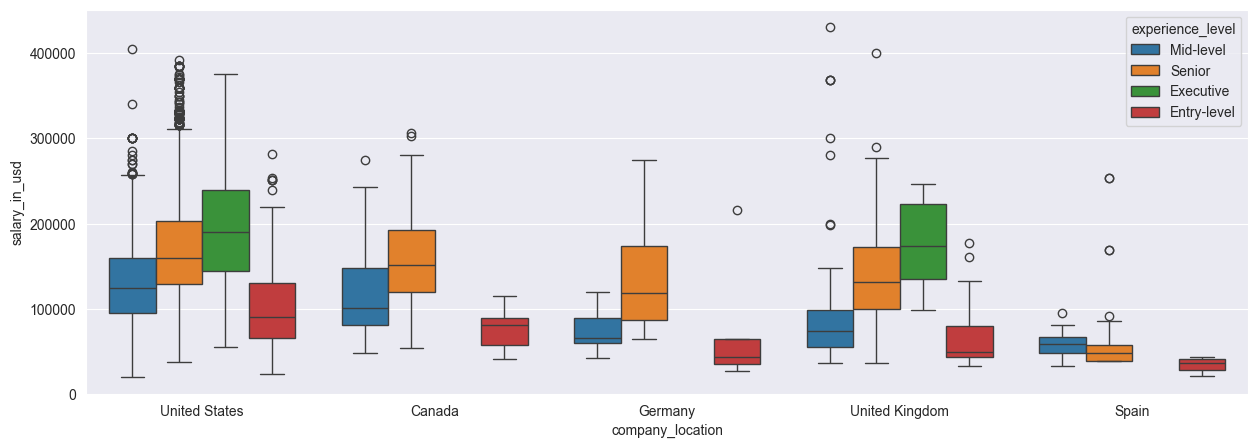

In [346]:
plt.figure(figsize=(15,5))

sns.boxplot(
    data = boxplot_dataframe,
    x = 'company_location',
    y = 'salary_in_usd',
    hue = 'experience_level',
    order = medians
)
plt.show()

#### Per job category

<Figure size 500x500 with 0 Axes>

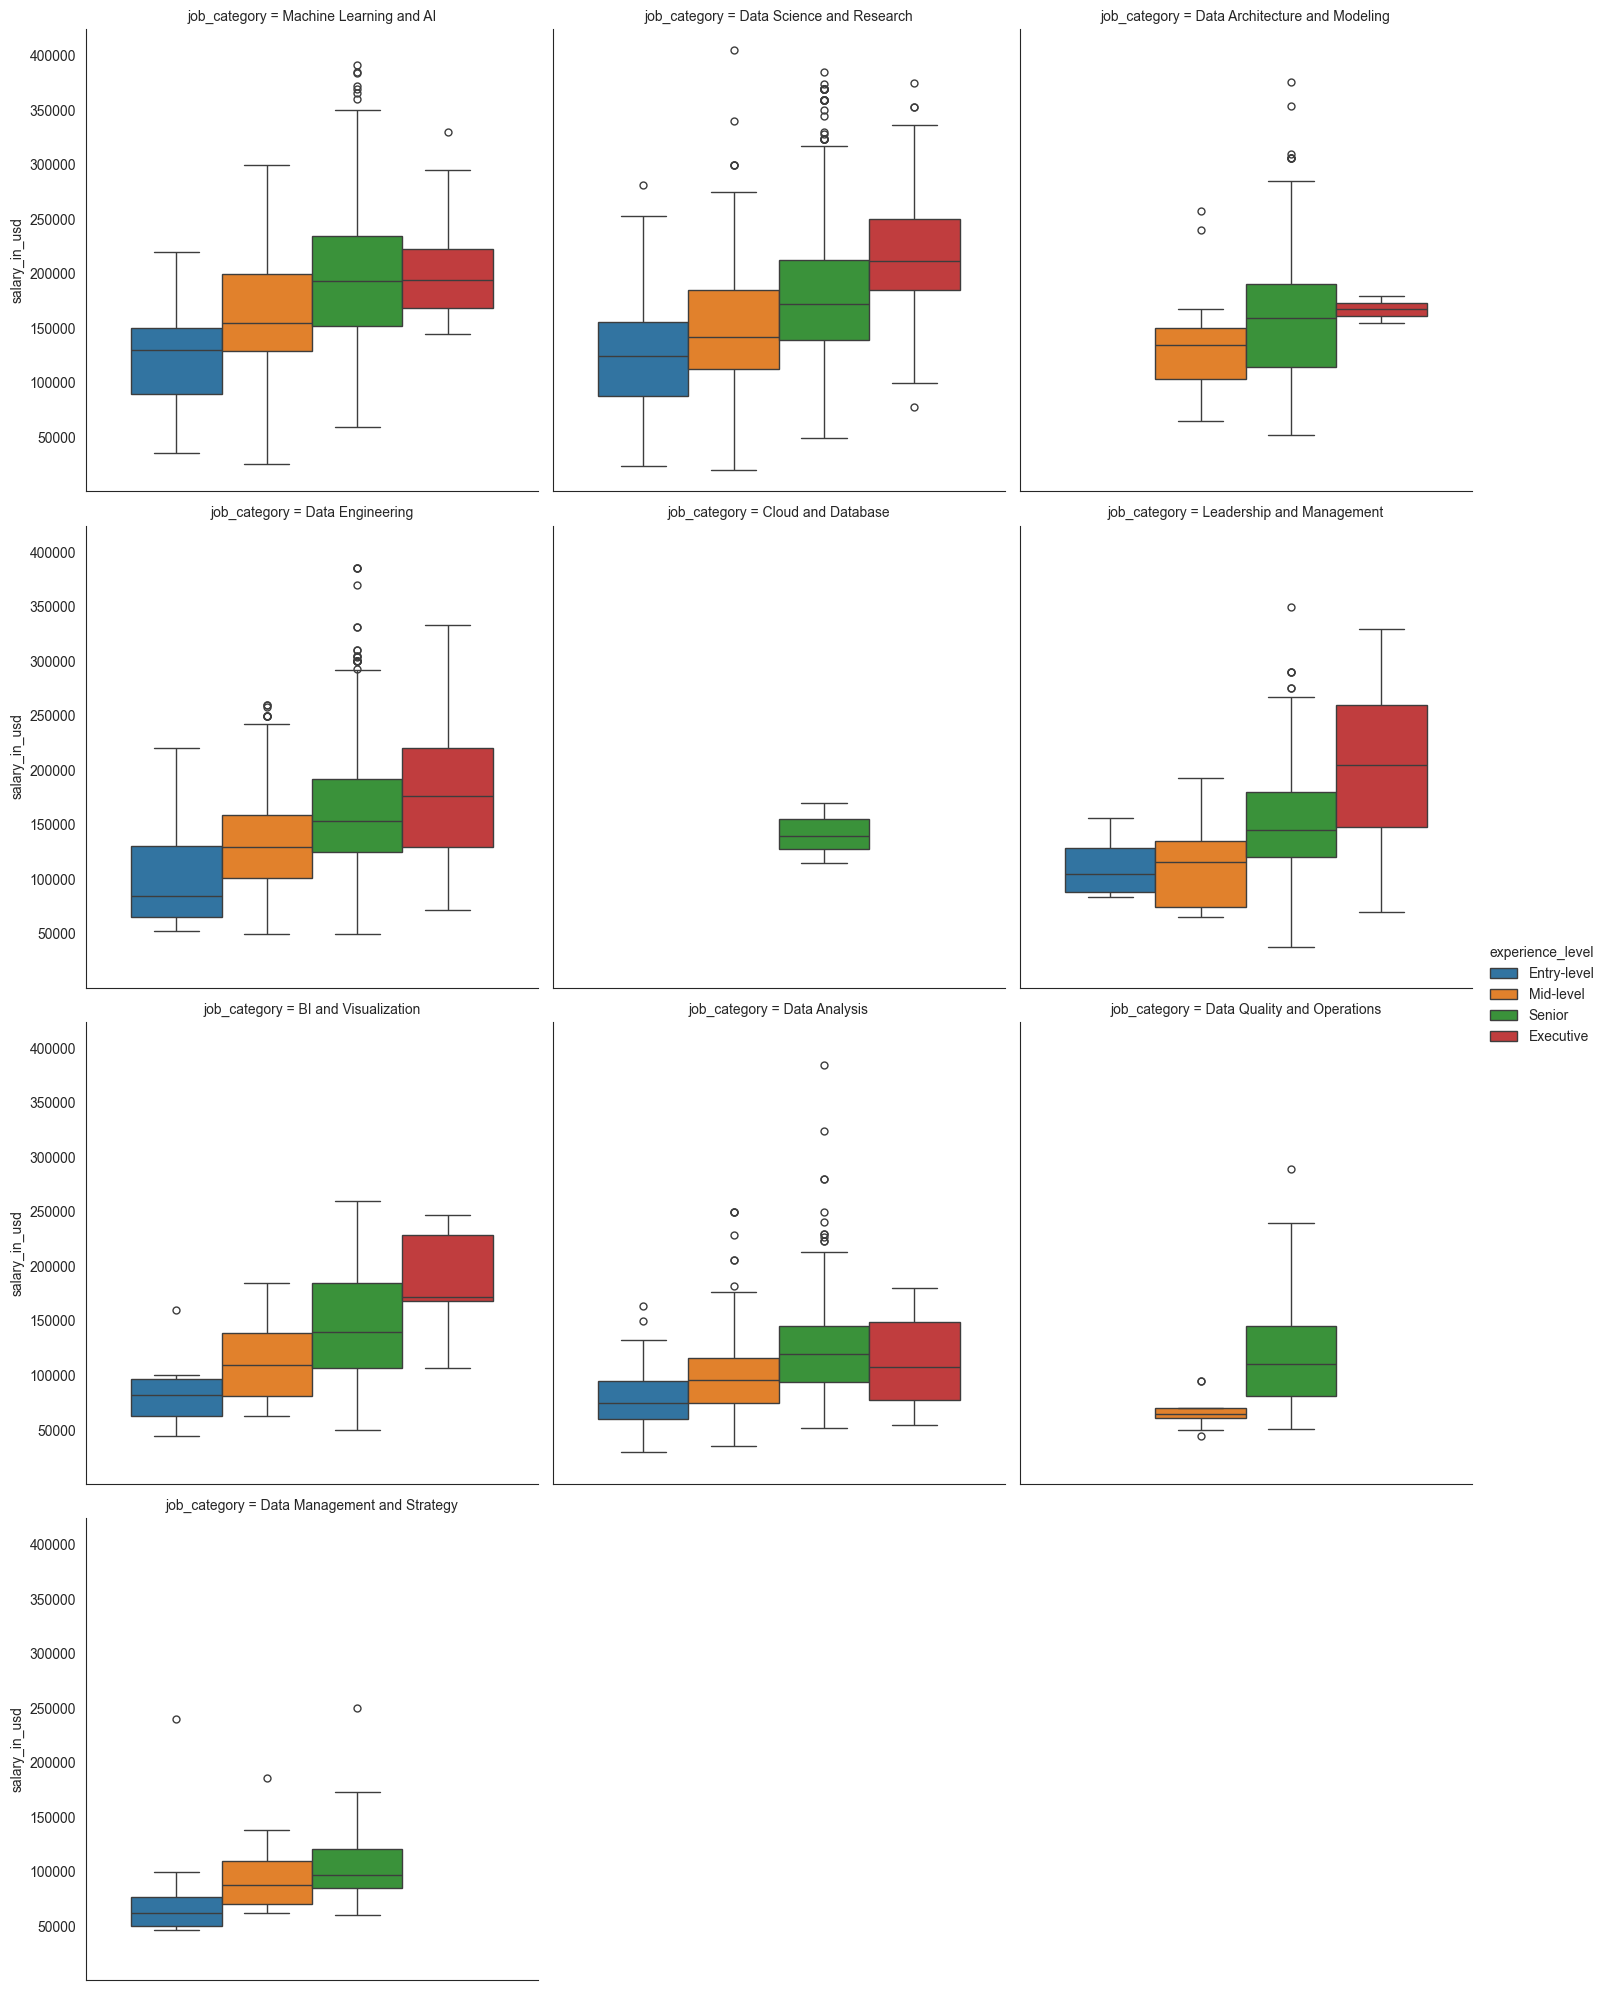

In [389]:
plt.figure(figsize=(5,5))

top_paid_USA = boxplot_dataframe[boxplot_dataframe['company_location']=="United States"]

medians2 = top_paid_USA.groupby('job_category')['salary_in_usd'].median().sort_values(ascending=False).index
level_order = ['Entry-level', 'Mid-level', 'Senior', 'Executive']


sns.catplot(
    data = top_paid_USA,
    kind = 'box',
    col = 'job_category',
    y = 'salary_in_usd',
    hue = 'experience_level',
    hue_order = level_order,
    col_order = medians2,
    col_wrap = 3
)
plt.show()

In [519]:
mean_pay = top_paid_USA.groupby(['job_category','experience_level'])['salary_in_usd'].mean().unstack('experience_level')
mean_pay = mean_pay[level_order].sort_values(by = 'Senior', ascending = False)
mean_pay_k = mean_pay/1000

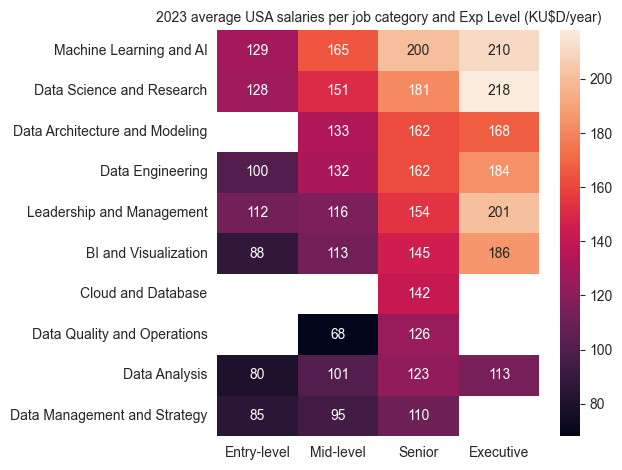

In [564]:
sns.set_style('white')
ax = sns.heatmap(
    data =mean_pay_k,
    annot= True,
    fmt = '.0f'
    )
ax.set_title('2023 average USA salaries per job category and Exp Level (KU$D/year)', fontsize = 10)
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()
plt.show()

In [629]:
mean_pay = top_paid_USA.groupby(['job_title','experience_level'])['salary_in_usd'].mean().unstack('experience_level')
mean_pay = mean_pay[level_order].sort_values(by = 'Senior', ascending = False)
mean_pay_k = mean_pay/1000

#### per work regime

In [428]:
jobs['work_setting'].value_counts()

work_setting
In-person    5730
Remote       3434
Hybrid        191
Name: count, dtype: int64

In [ ]:
level_order = ['Entry-level', 'Mid-level', 'Senior', 'Executive']

In [526]:
remote_person_ratio = top_paid_USA.groupby(['job_category','experience_level','work_setting'])['salary_in_usd'].mean()
remote_person_ratio = remote_person_ratio.unstack('work_setting').drop('Hybrid', axis = 1)
remote_person_ratio['ratio'] = remote_person_ratio['In-person']/remote_person_ratio['Remote']
remote_person_ratio = remote_person_ratio.drop(['In-person', 'Remote'], axis = 1)
remote_person_ratio = remote_person_ratio.unstack('experience_level')
remote_person_ratio = remote_person_ratio.droplevel(0,axis=1)
remote_person_ratio = remote_person_ratio[level_order]
remote_person_ratio = remote_person_ratio.reindex(plot_order)

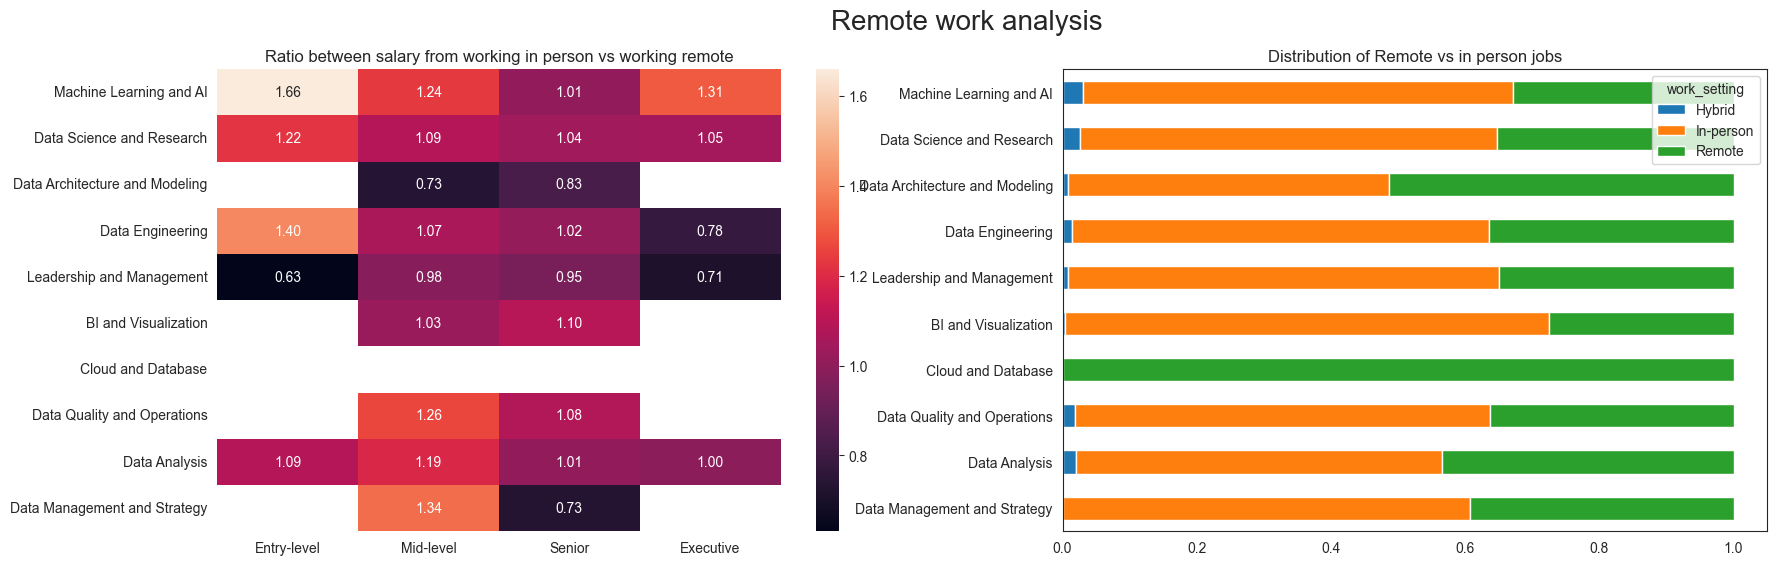

In [576]:
fig, axes = plt.subplots(1,2, figsize = (20,6))

fig.suptitle ('Remote work analysis', fontsize = 20)

## Graph1 - Heatmap
sns.set_style('white')
sns.heatmap(
    ax=axes[0],
    data =remote_person_ratio,
    annot= True,
    fmt = '.2f',
    square=False
    )
axes[0].set_title('Ratio between salary from working in person vs working remote')
axes[0].set_xlabel("")
axes[0].set_ylabel("")

## Graph1 - stacked horizontal bar
jobs.groupby('job_category')['work_setting'].value_counts(normalize=True).unstack('work_setting').reindex(plot_order)[::-1].plot(ax=axes[1],kind = 'barh', stacked=True)
axes[1].set_title('Distribution of Remote vs in person jobs')
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.tight_layout
plt.show()

# General Conclusions

## Number of Jobs
- Data-Related jobs have grown exponentially from 2020 till 2023.
- The most important fields in 2023 are as follows:


| Job Category          | % of total jobs|
| -------------         |---|
| Data Science          |32%|
| Data Engineering      |24%|
| Data Analysis         |15%|
| Machine Learning & AI |15%|
| Others                |12%|

- More than 60% of the current job offerings are set for Senior level professionals
- The great majority of the jobs are listed in the United States. But that might be because of the data source.



## Salaries

- Average Salaries have grown for all seniority levels, except for executives.
- The biggest growth was seen for Data Science and Machine Learning Categories, which now show the highest pay rate
- The 4 main category of jobs have around 40% of their workforce working remotely, and it does not show any strong correlation with the salary
